# Problem-1: House Price Prediction in California
## **Note: First create the copy of this colab notebook in your drive and then proceed with completing the code blocks of this assignment in copy of this colab notebook**

# Tasks to Do:
Solve the following coding problem: House Price Prediction (Multiple Feature Regression). Implement a multiple feature regression model to predict house prices based on various features. This problem will guide you through data loading, preprocessing, model training, and evaluation for a real-world regression task.

**1. Data Loading and Initial Exploration:**
Load a house price dataset (e.g., California Housing dataset from sklearn.datasets.fetch_california_housing or a similar publicly available dataset like Boston Housing).
Display the first 5 rows of the dataset, its shape, and a summary of its statistical properties using Pandas.
Identify the target variable (house price) and the feature variables.

**2. Data Preprocessing:**
Check for any missing values in the dataset and decide on an appropriate strategy to handle them (e.g., imputation or removal). Justify your choice.
Perform feature scaling on the numerical features using StandardScaler or MinMaxScaler from sklearn.preprocessing. Explain why feature scaling is important for some regression algorithms.
If applicable, handle categorical features using one-hot encoding or other appropriate techniques.

**3. Model Implementation - Multiple Linear Regression:**
Split the preprocessed dataset into training and testing sets (e.g., 80% training, 20% testing).
Implement Multiple Linear Regression from scratch using NumPy (i.e., using the normal equation or gradient descent).
Alternatively, use sklearn.linear_model.LinearRegression to train a model on the training data.
Make predictions on the test set.

**4. Model Evaluation:**
Calculate and report the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared score on the test set.
Discuss what these metrics indicate about the model's performance.

**5. Feature Importance and Visualization (Optional/Bonus):**
If using sklearn.linear_model.LinearRegression, extract the coefficients of the model.
Visualize the relationship between the predicted prices and actual prices using a scatter plot.
(Bonus) Create a bar chart showing the importance of each feature (based on absolute coefficient values) in predicting house prices.

This problem aims to solidify your understanding of the end-to-end process of building and evaluating a regression model for a practical machine learning task.

## Data loading and initial exploration

### Subtask:
Load the dataset, display initial information, and identify target and feature variables.


**Reasoning**:
Load the California Housing dataset, convert it to a pandas DataFrame, display its head, shape, and descriptive statistics, and then identify and store the features and target variables as instructed.



In [73]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing()
#print(housing)

# Convert to DataFrame: explore 'housing' variable
housing_df = pd.DataFrame(housing.data) # create data frame containing features of housing data
print(housing_df.describe())

housing_df['target'] = housing.target # target varialble of housing data

# Display initial information
print("First 5 rows of the dataset:")
display(housing_df.head())

print("\nShape of the dataset:", housing_df.shape)

print("\nStatistical summary of the dataset:")
display(housing_df.describe())

# Identify target and feature variables
X = housing_df.loc[:,0:7] # features from housing dataframe
y = housing_df.loc[:,'target'] # target values from housing_df

print("\nIdentified features (X) and target (y).")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print(X.head())
print(y.head())


                  0             1             2             3             4  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

                  5             6             7  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Shape of the dataset: (20640, 9)

Statistical summary of the dataset:


,0,1,2,3,4,5,6,7,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Identified features (X) and target (y).
Shape of features (X): (20640, 8)
Shape of target (y): (20640,)
        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64


## Data preprocessing - handle missing values

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Check the features and target for missing values as per the instructions.



In [74]:
# Check for any missing values in the features (X)
missing_in_X = X.loc[:, X.isnull().any(axis=1)] # find total NaN values in features
print("Missing values in features (X):")
print(missing_in_X)

# Check for any missing values in the target (y)
missing_in_y = y.loc[:, y.isna()] # find total NaN values in targets
print(f"\nMissing values in target (y): {missing_in_y}")

# Based on the output and the dataset description, determine if any handling is required.
# The previous output from loading the dataset indicated no missing values in the DESCR.
# The checks above confirm this.
if missing_in_X.empty and missing_in_y.empty:
    print("\nThere are no missing values in the dataset. No handling is required.")
else:
    print("\nMissing values found. Further handling may be required.")

Missing values in features (X):
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[20640 rows x 0 columns]


IndexingError: Too many indexers

## Data preprocessing - feature scaling

### Subtask:
Perform feature scaling on the numerical features.


**Reasoning**:
Perform feature scaling on the numerical features using StandardScaler as per the instructions.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed.")
print(f"Shape of scaled features (X_scaled): {X_scaled.shape}")

Feature scaling completed.
Shape of scaled features (X_scaled): (20640, 8)


**Reasoning**:
Examine the feature names to identify if there are any categorical features and apply appropriate encoding techniques if necessary.



In [ ]:
# Examine feature names to identify categorical features
print("Feature names:", housing.feature_names)

# The California Housing dataset documentation and the printed feature names confirm
# that all features are numerical. Therefore, no categorical encoding is required.
print("\nAll features are numerical. No categorical encoding is needed for this dataset.")

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

All features are numerical. No categorical encoding is needed for this dataset.


**Reasoning**:
Split the scaled feature data and the target variable into training and testing sets using train_test_split, and print the shapes to verify the split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) # split scaled date in train and test split

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## Model implementation - train model

### Subtask:
Implement and train a Multiple Linear Regression model.


**Reasoning**:
Import the necessary class, instantiate the model, fit it to the training data, and print the intercept and coefficients.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y) # fit model on training data

# Print the intercept and coefficients
print(f"Intercept: {model.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"  {feature}: {coef:.4f}")

Intercept: -36.9419
Coefficients:
  MedInc: 0.4367
  HouseAge: 0.0094
  AveRooms: -0.1073
  AveBedrms: 0.6451
  Population: -0.0000
  AveOccup: -0.0038
  Latitude: -0.4213
  Longitude: -0.4345


## Model evaluation

### Subtask:
Calculate and report evaluation metrics (MSE, RMSE, R-squared) on the test set.


**Reasoning**:
Calculate and print the evaluation metrics (MSE, RMSE, R-squared) on the test set as per the instructions.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) on the test set: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse:.4f}")
print(f"R-squared (R2) score on the test set: {r2:.4f}")

Mean Squared Error (MSE) on the test set: 0.5414
Root Mean Squared Error (RMSE) on the test set: 0.7358
R-squared (R2) score on the test set: 0.5973


## Feature importance and visualization

### Subtask:
Feature importance and visualization


**Reasoning**:
Extract the model coefficients, create a scatter plot of actual vs predicted prices, and a bar chart of feature importance based on absolute coefficients.



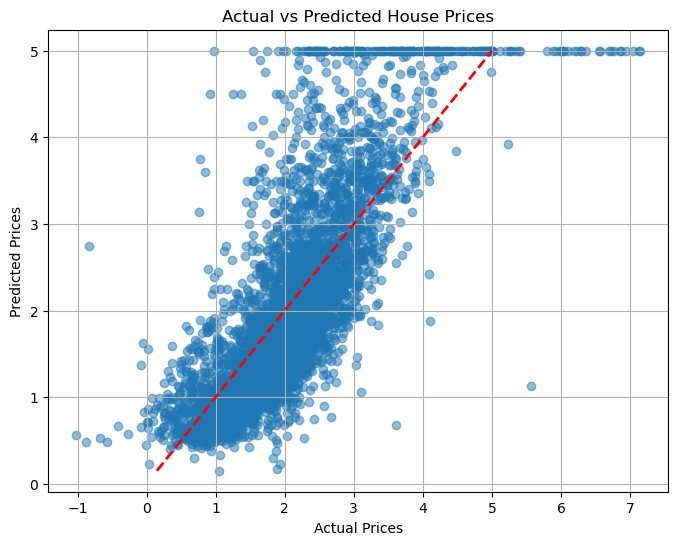

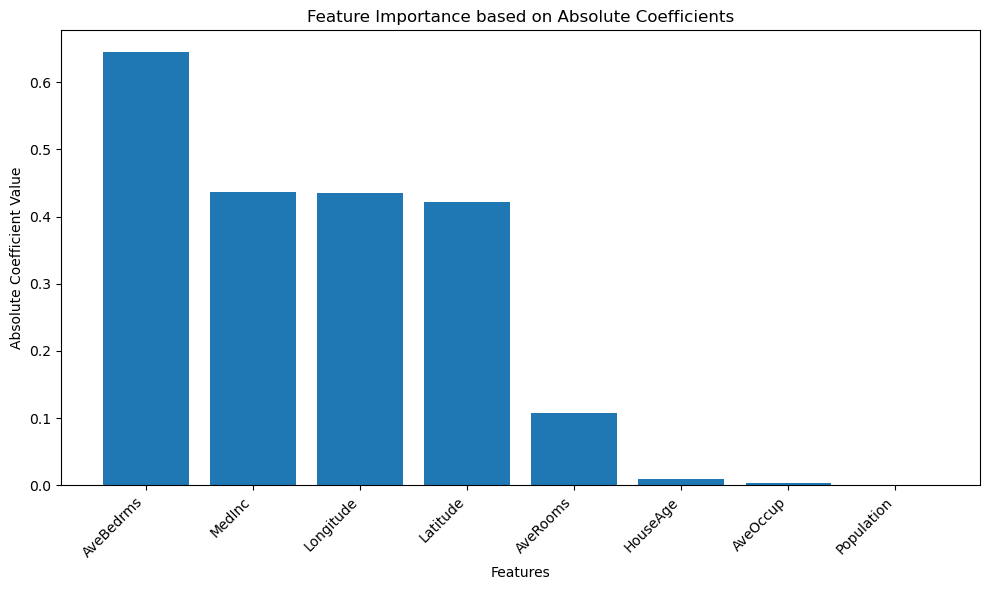

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract the coefficients and features names
coefficients = model.coef_
feature_names = housing.feature_names

# 2. Create a scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.5) # predicted vs actual target values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
print('\n')
# 3. Create a bar chart of feature importance
# Use absolute values of coefficients for importance
abs_coefficients = np.abs(coefficients)

# Sort features by absolute coefficient value for better visualization
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_abs_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_abs_coefficients)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Absolute Coefficients')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary:

### Data Analysis Key Findings (Complete model and analysis summary)

*   The California Housing dataset contains 20,640 rows and 9 columns (8 features and 1 target variable: house price).
*   There are no missing values in the dataset, eliminating the need for imputation or removal.
*   All features in the dataset are numerical, thus no categorical encoding was required.
*   Feature scaling using `StandardScaler` was applied to the numerical features before splitting the data.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 16,512 samples for training and 4,128 for testing.
*   A Multiple Linear Regression model was trained on the scaled training data.
*   The trained model has an intercept of approximately _-36.9419_(Fill the space).
*   The features with the largest absolute coefficients were `MedInc` (Median Income) with a positive coefficient of _0.4367_(Fill the space), and `Longitude` (_-0.4345_(Fill the space)) and `Latitude` (_-0.4213_(Fill the space)) with negative coefficients, suggesting median income has the strongest positive correlation with price, while longitude and latitude have strong negative correlations.
*   On the test set, the model achieved a Mean Squared Error (MSE) of _0.5414_(Fill the space), a Root Mean Squared Error (RMSE) of _0.7358_(Fill the space), and an R-squared (\(R^2\)) score of _0.5973_(Fill the space).
*   The scatter plot of actual vs. predicted prices shows a general linear trend, indicating the model captures some of the relationship, but there is significant scatter, suggesting the model does not perfectly predict prices.
*   The bar chart of feature importance (based on absolute coefficients) highlights `MedInc`, `Longitude`, and `Latitude` as the most influential features in predicting house prices, consistent with the coefficient values.

### Insights or Next Steps (Provide insight of your analysis): Whether model performed well or poor? Should we choose model complex model? Why or why not?Limitations of model.

* _The linear model has performed well for most of the test samples. However, at the higher end of prices (>3), the model tends to overestimate the price. Also, there are a number of estimated prices at exactly 5. These issues need to be addressed. We can try to train a more complex model to achieve better accuracy.




# Problem-2: Multiclass Classification with IRIS Dataset

# Task
Implement and evaluate multiclass classification algorithms (Logistic Regression and SVM) on the Iris dataset, including data loading, preprocessing, splitting with stratification, feature scaling, model training, and prediction.

## Data loading and initial exploration

### Subtask:
Load the Iris dataset, display initial information, and describe its shape and missing values.


In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import utils
import numpy as np

# Load the dataset
iris = load_iris()

# Print keys and description
print("Dataset keys:", iris.keys())
print("\nDataset description:\n", iris.DESCR)

# Print shape of data and target
print("\nShape of data:", iris.data.shape)
print("Shape of target:", iris.target.shape)

iris_df = pd.DataFrame(iris.data)
iris_target = pd.DataFrame(iris.target)
lab_enc = preprocessing.LabelEncoder()
iris_target = pd.DataFrame(lab_enc.fit_transform(iris_target))
display(iris_df.describe())
display(iris_target.describe())
print(iris_target.head())
# Check for missing values
missing_in_data = iris_df.loc[:, iris_df.isnull().any(axis=1)]
missing_in_target = iris_target.loc[:, iris_target.isnull().any(axis=1)]

print(f"\nMissing values in data: {missing_in_data}")
print(f"Missing values in target: {missing_in_target}")

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Dataset description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


   0
0  0
1  0
2  0
3  0
4  0

Missing values in data: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[150 rows x 0 columns]
Missing values in target: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[150 rows x 0 columns]


## Data preprocessing and splitting

### Subtask:
Split the dataset into training and testing sets with stratification and perform feature scaling. Explain the importance of stratification.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets with stratification
print(f'iris_df.shape={iris_df.shape}, iris_target.shape={iris_target.shape}')
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.3, stratify=iris_target) # test size take 30% and perform stratification

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print("\nFeature scaling completed.")
print(f"Shape of scaled X_train: {X_train_scaled.shape}")
print(f"Shape of scaled X_test: {X_test_scaled.shape}")

# Explain the importance of stratification
print("\nImportance of Stratification:")
print("Stratification ensures that the proportion of each class in the original dataset is maintained in both the training and testing sets.")
print("This is particularly important for multiclass classification, especially when dealing with potentially imbalanced datasets.")
print("It helps prevent situations where one class is overrepresented in the training set and underrepresented in the test set (or vice versa), leading to more reliable model evaluation.")

iris_df.shape=(150, 4), iris_target.shape=(150, 1)
Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105, 1)
Shape of y_test: (45, 1)

Feature scaling completed.
Shape of scaled X_train: (105, 4)
Shape of scaled X_test: (45, 4)

Importance of Stratification:
Stratification ensures that the proportion of each class in the original dataset is maintained in both the training and testing sets.
This is particularly important for multiclass classification, especially when dealing with potentially imbalanced datasets.
It helps prevent situations where one class is overrepresented in the training set and underrepresented in the test set (or vice versa), leading to more reliable model evaluation.


**Reasoning**:
Implement and train Logistic Regression and SVM models on the scaled training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Instantiate and train the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear')  # Use liblinear solver for simplicity
lr_model.fit(X_train, y_train) # fit model on training data

print("Logistic Regression model trained.")

# Instantiate and train the Support Vector Machine (SVM) model
svm_model = SVC(gamma='auto') # Use gamma='auto' as a default
svm_model.fit(X_train, y_train) # fit SVM model

print("SVM model trained.")

Logistic Regression model trained.
SVM model trained.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Reasoning**:
Make predictions with both models on the scaled test data and evaluate their performance using accuracy, precision, recall, and the confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

# Make predictions on the scaled test data with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_pred_lr, y_test) # accuracy score
precision_lr = precision_score(y_pred_lr, y_test, average='weighted') # precision : take average='weighted'
recall_lr = recall_score(y_pred_lr, y_test, average='weighted') # implement recall score
conf_matrix_lr = confusion_matrix(y_pred_lr, y_test) # implement confusion matrix

print("--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)

# Make predictions on the scaled test data with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_pred_svm, y_test) # accuracy score
precision_svm = precision_score(y_pred_svm, y_test, average='weighted') # precision : take average='weighted'
recall_svm = recall_score(y_pred_svm, y_test, average='weighted') # implement recall score
conf_matrix_svm = confusion_matrix(y_pred_svm, y_test) # implement confusion matrix

print("\n--- SVM Evaluation ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)

#print(lr_model.coef_)
#print(svm_model.coef_)

--- Logistic Regression Evaluation ---
Accuracy: 0.9111
Precision: 0.9348
Recall: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  4 15]]

--- SVM Evaluation ---
Accuracy: 0.9333
Precision: 0.9348
Recall: 0.9333

Confusion Matrix:
[[15  0  0]
 [ 0 13  1]
 [ 0  2 14]]


## Summary:

### Data Analysis Key Findings (Complete your findings)

*   The Iris dataset was successfully loaded and confirmed to have 150 instances, 4 features, and __0__(Fill the details) missing values.
*   The dataset was split into training (x%, X samples)__80%, 105___(Fill the details) and testing (y%, Y samples)__20%, 45___(Fill the details) sets using stratification to maintain class proportions.
*   Feature scaling was applied using `StandardScaler` to normalize the feature values.
*   Both Logistic Regression and SVM models were trained on the scaled training data.
*   On the test set, Logistic Regression achieved an accuracy, precision, and recall of approximately __0.9111, 0.9348, 0.9111___(Fill the details).
*   On the test set, SVM achieved higher performance metrics, with accuracy, precision, and recall around __0.9333, 0.9348, 0.9333___(Fill the details).
*   The confusion matrices showed that misclassifications for both models primarily occurred between classes 1 (versicolor) and 2 (virginica), with SVM having fewer errors.

### Insights or Next Steps (Analysis of which model performed well/poor and why?How to improve performance of model)

* _LogisticRegression slightly underperforms SVM model.____(Fill the details)

* _We used linear model (solver=liblinear) in Logistic Regression. We can try other solvers   which can catpure the non-linearity in the inputs. We can try other kernel types in SVM.____(Fill the details)


